<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/04%20Clasificacion_Agrupamiento/3%20Agrupamiento/Notebooks/Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="100%" src="../img/data_science_rec.jpg"/> <br> <br>Modelos de agrupamiento<br>(Clustering)</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas</u>:
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

# &#9991; <u> La tarea de clustering</u>

* El análisis de agrupamiento, o agrupamiento, es una tarea de aprendizaje automático no supervisada.

* Implica descubrir automáticamente la agrupación natural de los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de agrupación solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características.

* Un grupo es a menudo un área de densidad en el espacio de características donde los ejemplos del dominio (observaciones o filas de datos) están más cerca del grupo que otros grupos. El grupo puede tener un centro (el centroide) que es una muestra o un espacio de entidades de puntos y puede tener un límite o extensión.

* Es probable que estos grupos reflejen algún mecanismo en funcionamiento en el dominio del que se extraen las instancias, un mecanismo que hace que algunas instancias tengan un parecido más fuerte entre sí que con las instancias restantes.

* La agrupación en clústers puede ser útil como actividad de análisis de datos para obtener más información sobre el dominio del problema, el llamado descubrimiento de patrones o descubrimiento de conocimiento.

* El agrupamiento también puede ser útil como un tipo de ingeniería de características, donde los ejemplos existentes y nuevos se pueden mapear y etiquetar como pertenecientes a uno de los grupos identificados en los datos.

* La evaluación de los grupos identificados es subjetiva y puede requerir un experto en el dominio, aunque existen muchas medidas cuantitativas específicas de los grupos. Típicamente, los algoritmos de agrupamiento se comparan académicamente en conjuntos de datos sintéticos con grupos predefinidos, que se espera que descubra un algoritmo.

___

## Algoritmos de [agrupamiento en scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

* Hay muchos tipos de algoritmos de agrupamiento.

* Muchos algoritmos utilizan **grados de similitud** o **medidas de distancia** entre ejemplos en el espacio de características en un esfuerzo por descubrir regiones densas de observaciones. Como tal, a menudo es una buena práctica escalar datos antes de usar algoritmos de agrupamiento.

* Algunos algoritmos de agrupamiento requieren que se especifique el número de agrupaciones a descubrir en los datos, mientras que otros requieren la especificación de una distancia mínima entre observaciones en la que los ejemplos pueden considerarse "cercanos" o "conectados".

* Como tal, el análisis de clusters es un proceso iterativo en el que la evaluación subjetiva de los conglomerados identificados retroalimenta cambios en la configuración del algoritmo hasta que se logra un resultado deseado o apropiado.

## Demostración de algunos algoritmos de agrupamiento

### Generación de datos sintéticos

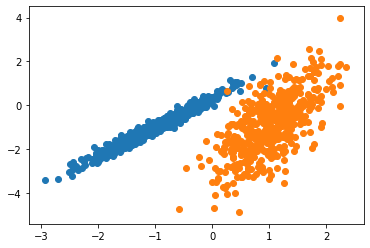

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

for clase in range(2):
    fila = np.where(y == clase)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

* [Brendan J. Frey, Delbert Dueck (2007). Clustering by passing messages between data points. Science 315 (5814); pp. 972-6.](https://pdfs.semanticscholar.org/ea78/2c8b0848987e9575ea648e0419054d3f5bbf.pdf?_ga=2.62870572.1030401696.1591021245-1055786045.1581021538)

* "_Introducimos un método que considera simultáneamente todos los puntos de datos como ejemplos potenciales. Al ver cada punto de datos como un nodo en una red, ideamos un método que transmite de forma recurrente mensajes de valor real a través de la red hasta que surge un buen conjunto de ejemplares y grupos correspondientes. Como se describe más adelante, los mensajes se actualizan sobre la base de fórmulas simples que buscan mínimos de una función de energía elegida apropiadamente. En cualquier momento, la magnitud de cada mensaje refleja la afinidad actual que tiene un punto de datos para elegir otro punto de datos como su ejemplar, por lo que llamamos a nuestro método "propagación de afinidad"_".Op.cit.

<table>
    <td> <img align="left" width="100%" src="../img/affinity_propagation.jpg"/></td>
    <td> <img align="left" width="100%" src="../img/AP_RESP_DISP.jpg"/></td>
</table>

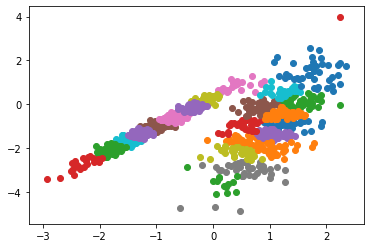

In [13]:
from sklearn.cluster import AffinityPropagation

modelo = AffinityPropagation(damping=0.9,max_iter=500,random_state=None)

modelo.fit(X)
yhat = modelo.predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [Clustering Jerárquico](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

* La agrupación jerárquica es una familia general de algoritmos de agrupación que crean agrupaciones anidadas fusionándolas o dividiéndolas sucesivamente. Esta jerarquía de grupos se representa como un árbol (o dendrograma). La raíz del árbol es el grupo único que reúne todas las muestras, siendo las hojas los grupos con una sola muestra.
* El objeto [AgglomerativeClustering de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) realiza una agrupación jerárquica utilizando un enfoque ascendente (bottom-up): cada observación comienza en su propio grupo, y los grupos se fusionan sucesivamente. Los criterios de vinculación (_linkage_) determinan la métrica utilizada para la estrategia de fusión:
  - _Ward_ minimiza la suma de las diferencias al cuadrado dentro de todos los grupos. Es un enfoque que minimiza la varianza y, en este sentido, es similar a la función objetivo de k-means pero se aborda con un enfoque jerárquico aglomerativo.
  - _Maximum_ o _complete Linkage_ minimiza la distancia máxima entre observaciones de pares de grupos.
  - _Average linkage_ minimiza el promedio de las distancias entre todas las observaciones de pares de grupos.
  - _Single linkage_ minimiza la distancia entre las observaciones más cercanas de pares de grupos.

AgglomerativeClustering también puede escalar a un gran número de muestras cuando se usa conjuntamente con una matriz de conectividad, pero es computacionalmente costoso cuando no se agregan restricciones de conectividad entre muestras: considera en cada paso todas las fusiones posibles.

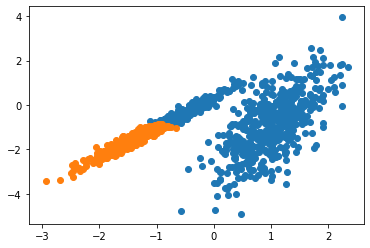

In [20]:
from sklearn.cluster import AgglomerativeClustering

# descomenta la siguiente línea si quieres ver un dendograma
#""" 
modelo = AgglomerativeClustering(n_clusters=2)
no_dendo=True
"""
modelo = AgglomerativeClustering(distance_threshold=5.0,n_clusters=None,compute_full_tree=True)
no_dendo=False
"""

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

if not no_dendo:
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(modelo, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

### [BIRCH](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
* Tian Zhang, Raghu Ramakrishnan and Miron Livny (1996). _BIRCH: An Efficient Data Clustering Method for Very Large Databases_.  ACM SIGMOD Record. DOI:10.1145/235968.233324.
* BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) es un método de clustering de tipo jerárquico bottom-up, especialmente diseñado para grandes bases de datos. 
* BIRCH agrupa de forma incremental y dinámica datos métricos (que satisfacen los requisitos de una métrica Euclidiana) multidimensionales de entrada para intentar producir la mejor calidad de agrupación con los recursos disponibles (es decir, memoria disponible y limitaciones de tiempo). 
* BIRCH es también el primer algoritmo de agrupamiento propuesto en el área de base de datos para manejar ruido (puntos que no son parte del patrón subyacente) de manera efectiva.
* El algoritmo BIRCH se basa en la construcción iterativa de un árbol cuyos nodos son tripletas (llamadas Clustering Features -CF) que resumen la información acerca de un cluster; CF=(N,LS,SS), donde N es el número de puntos en un cluster, LS es la suma lineal de los N puntos ($LS=\sum_i X_i$) y SS es la suma al cuadrado de los N puntos ($SS=\sum_i X_i^2$). La idea de CF es mantener una representación compacta de los clusters ya que su aglomeración se calcula fácilmente como $CF_i+CF_j=(N_i+N_j,LS_i+LS_j,SS_i+SS_j)$. Asimismo, se puede demostrar que a partir de $CF$ es posible calcular cualquier métrica de calidad usualmente empleada.
* La idea es construir el árbol de manera iterativa con base en un factor de ramificación B y un umbral T. Se parte de un nodo raíz al cuál se van agregando hijos ($child$'s) con base en una heurística.
* Cada nodo no-hoja contiene cuando mucho B entradas, y un nodo hoja representa un cluster hecho de todos los subclusters representados por sus entradas de forma $[CF_i]$, donde $i=1,2,\ldots,L$. Pero todas las entradas de un nodo hoja deben respetar el valor de umbral T, que representa la cota superior del diámetro (o radio) del cluster. El tamaño del árbol es función de T. Cuanto más grande, más pequeño el árbol.

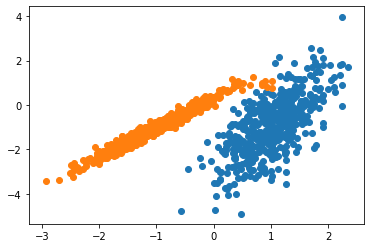

In [23]:
from sklearn.cluster import Birch

modelo = Birch(threshold=0.01, n_clusters=2)

modelo.fit(X)
yhat = modelo.predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
* [Martin Ester, Hans-Peter Kriegel, Jörg Sander, Xiaowei Xu (1996). _A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise_. Proceedings of Knowledge Discovery and Databases - The International Conference on Knowledge Discovery & Data Mining.](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)
* DBSCAN recurre a una noción de cúmulos basada en la densidad de los mismos, que está diseñada para descubrir grupos de formas arbitrarias. DBSCAN requiere solo un parámetro de entrada y ayuda al usuario a determinar un valor apropiado para éste.
<br>
<img align="left" width="100%" src="../img/DBSCAN_1.jpg"/>
<br>
* "_La razón principal por la que reconocemos los grupos, es que dentro de cada grupo tenemos una densidad típica de puntos que es considerablemente más alta que fuera del grupo. Además, la densidad dentro de las áreas de ruido es menor que la densidad en cualquiera de los grupos._" Op. cit.

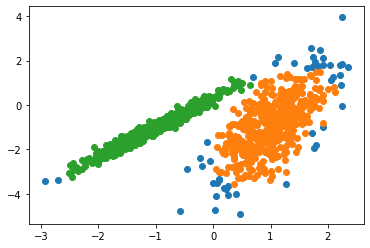

In [31]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN(eps=0.30, min_samples=9)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [K-MEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

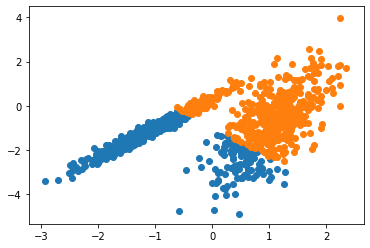

In [32]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=2)

modelo.fit(X)
yhat = modelo.predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

* La agrupación espectral es una clase general de métodos de agrupación, extraída del álgebra lineal.

* "_Una alternativa prometedora que ha surgido recientemente en varios campos es utilizar métodos espectrales para la agrupación. Aquí, uno usa los vectores propios más altos de una matriz derivada de la distancia entre puntos._" [Andrew Y. Ng, Michael I. Jordan and Yair Weiss (2002). _On Spectral Clustering: Analysis and an algorithm_. In ADVANCES IN NEURAL INFORMATION PROCESSING SYSTEMS.](https://papers.nips.cc/paper/2092-on-spectral-clustering-analysis-and-an-algorithm.pdf)

* El hiperparámetro "n_clusters" es utilizado para especificar el número estimado de clústeres en los datos.

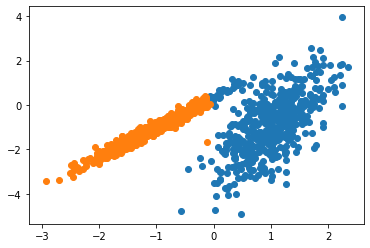

In [33]:
from sklearn.cluster import SpectralClustering

modelo = SpectralClustering(n_clusters=2)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [Growing Neural Gas](http://neupy.com/apidocs/neupy.algorithms.competitive.growing_neural_gas.html)

* El algoritmo GNG, publicado por Bernd Fritzke (Fritzke, B.  A self-organizing network that can follow non-stationary distributions, Proc. of the International Conference on Artificial Neural Networks '97, Springer, 1997, pp. 613-618), es un algoritmo de agrupamiento incremental no supervisado. 
#### La siguiente explicación fue extraída de [Growing Neural Gas  Experiments with GNG,  GNG with Utility and Supervised GNG - Jim Holmström - Uppsala University - Sweden](http://www.booru.net/download/MasterThesisProj.pdf)
* Dada alguna distribución de entrada en $R^n$, GNG crea incrementalmente un gráfo donde cada nodo en el gráfico tiene una posición en $R^n$. 
* GNG se puede utilizar para la cuantización de vectores al encontrar los vectores de código en grupos.
* La cuantización vectorial (Vector Quatization) es el proceso de cuantizar vectores de entrada n-dimensionales en un conjunto limitado de vectores de salida n-dimensionales denominados vectores de código. El conjunto de posibles vectores de código se denomina libro de códigos. El libro de códigos generalmente se genera agrupando un conjunto dado de vectores de entrenamiento (llamado conjunto de entrenamiento), el libro de códigos se usa para cuantizar los vectores de entrada.
* En GNG, estos vectores de código están representados por los vectores de referencia (la posición) de los nodos de GNG. También se puede usar para encontrar estructuras topológicas que reflejen de cerca la estructura de la distribución de entrada. 
* GNG es un algoritmo adaptativo en el sentido de que si la distribución de entrada cambia lentamente con el tiempo, GNG puede adaptarse, es decir, mover los nodos para cubrir la nueva distribución. 

In [ ]:
# Para colab
# !pip install neupy

In [3]:
from neupy import algorithms

gng = algorithms.GrowingNeuralGas(n_inputs=2,\
                                  shuffle_data=True,\
                                  verbose=True,\
                                  max_edge_age=10,\
                                  n_iter_before_neuron_added=50,
                                  max_nodes=100)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 10
[OPTION] max_nodes = 100
[OPTION] min_distance_for_update = 0.0
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 50
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.2
[OPTION] verbose = True



In [8]:
gng.train(X,epochs=8)

#12 : [131 ms] train: 0.114235
#13 : [118 ms] train: 0.115387


#14 : [113 ms] train: 0.115404
#15 : [102 ms] train: 0.114846


#16 : [114 ms] train: 0.112715
#17 : [116 ms] train: 0.114594
#18 : [107 ms] train: 0.114075
#19 : [116 ms] train: 0.114557


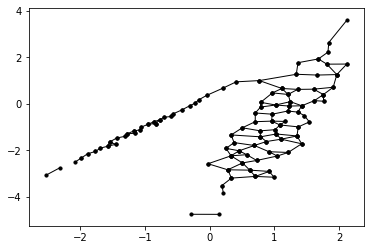

In [9]:
lines = []
for node_1, node_2 in gng.graph.edges:
    weights = np.concatenate([node_1.weight, node_2.weight])
    line, = plt.plot(*weights.T, color='black')

    plt.setp(line, linewidth=1, color='black')

    lines.append(line)
    lines.append(plt.scatter(*weights.T, color='black', s=10))
plt.show()


#242 : [0 ns] train: 0.104704


#243 : [4 ms] train: 0.106197


#244 : [0 ns] train: 0.096879


#245 : [16 ms] train: 0.115278


#246 : [0 ns] train: 0.117631


#247 : [0 ns] train: 0.135675


#248 : [0 ns] train: 0.105078


#249 : [0 ns] train: 0.110885


#250 : [0 ns] train: 0.100061


#251 : [0 ns] train: 0.096002


#252 : [3 ms] train: 0.087662


#253 : [3 ms] train: 0.102164


#254 : [0 ns] train: 0.101360


#255 : [0 ns] train: 0.114358


#256 : [16 ms] train: 0.111582


#257 : [16 ms] train: 0.098272


#258 : [16 ms] train: 0.121243


#259 : [3 ms] train: 0.103592


#260 : [2 ms] train: 0.100931


#261 : [0 ns] train: 0.100981


#262 : [0 ns] train: 0.095087


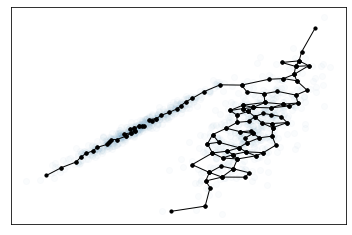

In [11]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, clear_output, HTML
from neupy import algorithms, utils

data = X[:]

fig = plt.figure()
plt.scatter(*data.T, alpha=0.02)
plt.xticks([], [])
plt.yticks([], [])

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
    
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(range(220), initial=1, position=0), interval=30, blit=True)
HTML(anim.to_html5_video())

In [19]:
print(tf.__version__)

1.13.2
